In [69]:
from torch.nn.functional import conv2d
import torch
import numpy as np
import array_to_latex as a2l
import matplotlib.pyplot as plt

\begin{bmatrix}
  0  &  0  & -1  &  0  &  0  &  0  &  1  &  0  &  0 \\
  0  & -1  & -1  & -1  &  0  &  1  &  1  &  1  &  0 \\
 -1  & -1  & -1  & -1  &  0  &  1  &  1  &  1  &  1 \\
  0  & -1  & -1  & -1  &  0  &  1  &  1  &  1  &  0 \\
  0  &  0  & -1  &  0  &  0  &  0  &  1  &  0  &  0 
\end{bmatrix}
\begin{bmatrix}
  0.0 & -0.5 &  0.0\\
 -0.5 &  1.0 & -0.5\\
  0.0 & -0.5 &  0.0
\end{bmatrix}
total energy= tensor(24.)


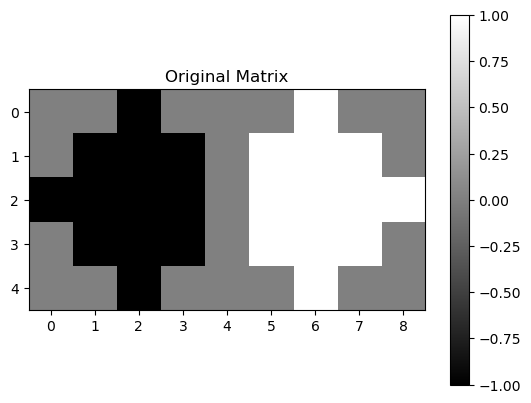

In [70]:
data = np.array([[+0, +0, -1, +0, +0, +0, +1, +0, +0],
                [+0, -1, -1, -1, +0, +1, +1, +1, +0],
                [-1, -1, -1, -1, +0, +1, +1, +1, +1],
                [+0, -1, -1, -1, +0, +1, +1, +1, +0],
                [+0, +0, -1, +0, +0, +0, +1, +0, +0]])
a2l.to_ltx(data, frmt='{:d}', arraytype='bmatrix')
mat_in = torch.tensor(data)
mat_in = torch.unsqueeze(torch.unsqueeze(mat_in, 0), 0).float()
kernel = np.array(([  +0, -0.5,   +0],
                       [-0.5,   +1, -0.5],
                       [  +0, -0.5,   +0]))
a2l.to_ltx(kernel, frmt='{:.1f}', arraytype='bmatrix')
kernel = torch.tensor(kernel)
kernel = torch.unsqueeze(torch.unsqueeze(kernel, 0), 0).float()
kernel = kernel
# print(kernel)
# print(mat_in)
fig, ax = plt.subplots(1, 1)
mat_in = mat_in.squeeze()
p1 = ax.imshow(mat_in.squeeze(), cmap='gray')
ax.set_title('Original Matrix')
fig.colorbar(p1, ax=ax)
plt.savefig('q4_1_orig.pdf', dpi=500, bbox_inches='tight')

print('total energy=', sum(mat_in.flatten() ** 2))

\begin{bmatrix}
  0.00 &  1.00 & -0.50 &  1.00 &  0.00 & -1.00 &  0.50 & -1.00 &  0.00\\
  1.00 &  0.00 &  1.00 &  0.00 &  0.00 &  0.00 & -1.00 &  0.00 & -1.00\\
 -0.50 &  1.00 &  1.00 &  0.50 &  0.00 & -0.50 & -1.00 & -1.00 &  0.50\\
  1.00 &  0.00 &  1.00 &  0.00 &  0.00 &  0.00 & -1.00 &  0.00 & -1.00\\
  0.00 &  1.00 & -0.50 &  1.00 &  0.00 & -1.00 &  0.50 & -1.00 &  0.00
\end{bmatrix}
total energy= 22.0


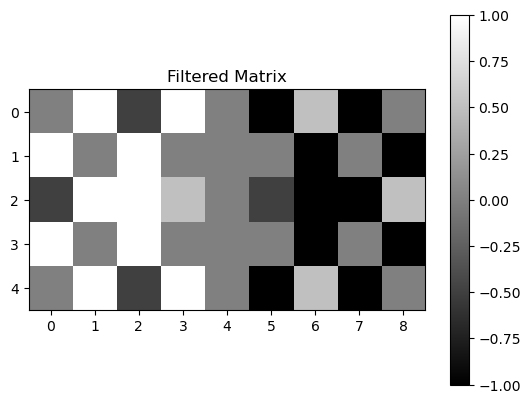

In [71]:
def conv_res_to_latex(mat, k):
    rrr = np.array(conv2d(mat, k, stride=1, padding=1, dilation=1, groups=1).squeeze())
    a2l.to_ltx(rrr, frmt='{:.2f}', arraytype='bmatrix')
    return rrr


mat_in = mat_in.unsqueeze(0)
mat_filtered = conv_res_to_latex(mat=mat_in, k=kernel).squeeze()
fig, ax = plt.subplots(1, 1)
p1 = ax.imshow(mat_filtered.squeeze(), cmap='gray')
ax.set_title('Filtered Matrix')
fig.colorbar(p1, ax=ax)
plt.savefig('q4_1_filtered.pdf', dpi=500, bbox_inches='tight')

print('total energy=', sum(mat_filtered.flatten() ** 2))

total energy= 248152700


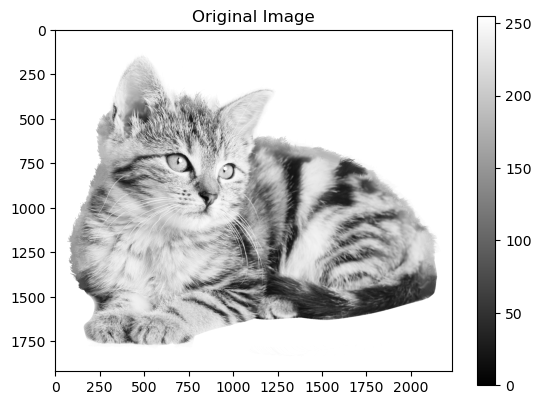

In [72]:
import torchvision.transforms as transforms
import PIL.Image as Image
cat = Image.open('cat.png')
cat = cat.convert('L')

fig, ax = plt.subplots(1, 1)
p1 = ax.imshow(cat, cmap='gray')
ax.set_title('Original Image')
fig.colorbar(p1, ax=ax)
plt.savefig('q4_2_orig.pdf', dpi=500, bbox_inches='tight')

print('total energy=', sum(np.array(cat).flatten() ** 2))

torch.Size([1, 1, 1920, 2232])
torch.Size([1, 1, 3, 3])
total energy= 203831801017.75


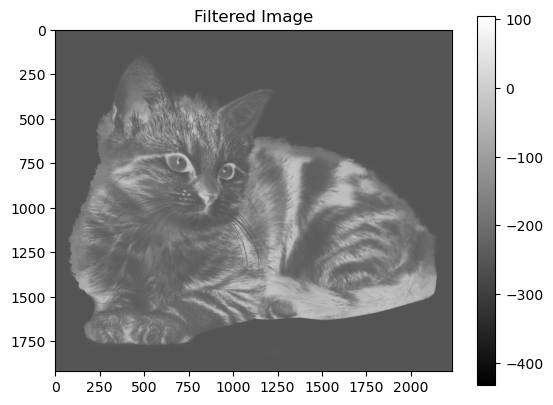

In [73]:
transform = transforms.Compose([
    transforms.PILToTensor()
])
img_tensor = transform(cat)
img_tensor = img_tensor.unsqueeze(0)
print(img_tensor.shape)
kernel = torch.tensor(([  +0, -0.5,   +0],
                       [-0.5,   +1, -0.5],
                       [  +0, -0.5,   +0]))
kernel = kernel.repeat(1, 1, 1, 1)
print(kernel.shape)
img_conv = np.array(conv2d(img_tensor.float(), kernel, stride=1, padding=1, dilation=1, groups=1).squeeze())

fig, ax = plt.subplots(1, 1)
p1 = ax.imshow(img_conv, cmap='gray')
ax.set_title('Filtered Image')
fig.colorbar(p1, ax=ax)
plt.savefig('q4_2_filtered.pdf', dpi=500, bbox_inches='tight')

print('total energy=', sum(img_conv.flatten() ** 2))